In [ ]:
import pandas as pd
import numpy as np

# Load Data In

In [ ]:
#load calendar data
calendar = pd.read_csv('calendar.csv.gz', compression='gzip')

In [ ]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2023-03-09,f,$60.00,$60.00,1.0,1125.0
1,19091,2023-03-10,f,$80.00,$80.00,1.0,1125.0
2,19091,2023-03-11,f,$111.00,$111.00,1.0,1125.0
3,19091,2023-03-12,f,$60.00,$60.00,1.0,1125.0
4,19091,2023-03-13,f,$60.00,$60.00,1.0,1125.0


# Checking missing values in our data

In [ ]:
#calendar.sum().isnull() / len(calendar)

# EDA

In [ ]:
calendar.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,2.574386e+06,2574386,2574386,2573271,2573271,2.574380e+06,2.574380e+06
unique,NaN,366,2,4277,4269,NaN,NaN
top,NaN,2024-03-06,f,$150.00,$150.00,NaN,NaN
freq,NaN,7054,1324310,64441,63885,NaN,NaN
mean,2.181939e+17,NaN,NaN,NaN,NaN,1.017839e+01,4.617934e+06
std,3.260054e+17,NaN,NaN,NaN,NaN,1.793390e+01,9.946835e+07
min,1.909100e+04,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00
25%,2.337951e+07,NaN,NaN,NaN,NaN,2.000000e+00,3.650000e+02
50%,4.308801e+07,NaN,NaN,NaN,NaN,2.000000e+00,1.125000e+03
75%,5.868368e+17,NaN,NaN,NaN,NaN,2.900000e+01,1.125000e+03


# Market Supply Time Series Analysis

In [ ]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2023-03-09,f,$60.00,$60.00,1.0,1125.0
1,19091,2023-03-10,f,$80.00,$80.00,1.0,1125.0
2,19091,2023-03-11,f,$111.00,$111.00,1.0,1125.0
3,19091,2023-03-12,f,$60.00,$60.00,1.0,1125.0
4,19091,2023-03-13,f,$60.00,$60.00,1.0,1125.0


In [ ]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2574381,900084,2024-03-04,f,"$1,000.00","$1,000.00",30.0,1125.0
2574382,900084,2024-03-05,f,"$1,000.00","$1,000.00",30.0,1125.0
2574383,900084,2024-03-06,f,"$1,000.00","$1,000.00",30.0,1125.0
2574384,900084,2024-03-07,f,"$1,000.00","$1,000.00",30.0,1125.0
2574385,900084,2024-03-08,f,"$1,000.00","$1,000.00",30.0,1125.0


In [ ]:
calendar['available'] = calendar['available'].replace(['f', 't'], [0, 1])

In [ ]:
calendar['available'].value_counts()

0    1324310
1    1250076
Name: available, dtype: int64

In [ ]:
calendar['date'] = pd.to_datetime(calendar.date, format='%Y/%m/%d')

In [ ]:
mkt_sup_subset = calendar[calendar['available'] == 1]
mkt_sup_subset['available'].value_counts()

1    1250076
Name: available, dtype: int64

In [ ]:
mkt_sup_ts = mkt_sup_subset.groupby('date').available.count()
mkt_sup_ts

date
2023-03-09    1307
2023-03-10    1681
2023-03-11    1385
2023-03-12    1948
2023-03-13    2200
              ... 
2024-03-04    2430
2024-03-05    2433
2024-03-06    2431
2024-03-07    2433
2024-03-08     272
Name: available, Length: 366, dtype: int64

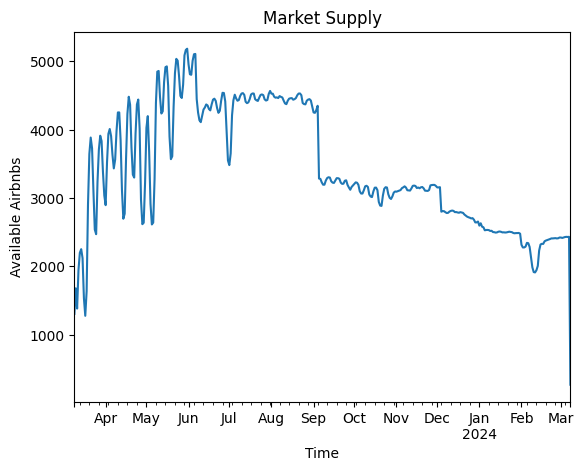

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

ax = mkt_sup_ts.plot()
ax.set_title('Market Supply')
ax.set_xlabel('Time')
ax.set_ylabel('Available Airbnbs')

plt.show()

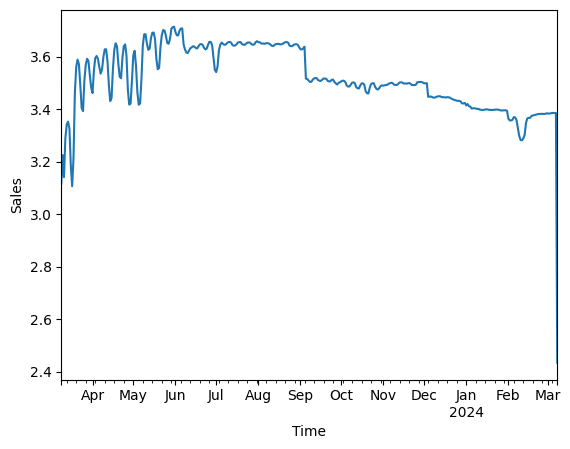

In [ ]:
#looking at logarithmic transformation of time series to see of homeostaticity can be achieved 

import numpy as np

mkt_sup_log = np.log10(mkt_sup_ts)

ax = mkt_sup_log.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Available Airbnbs (log)')
plt.show()

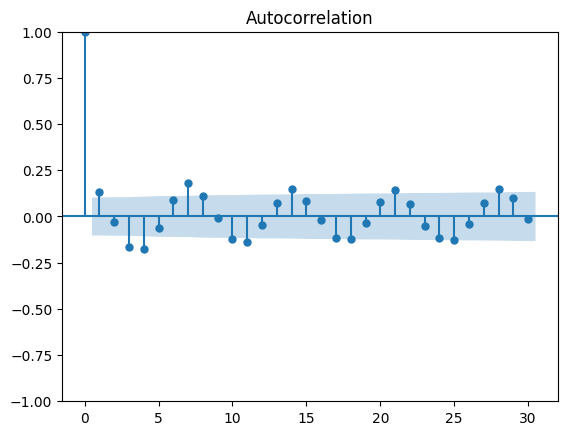

In [ ]:
#ACF checks auto correlation in the data to check for seasonality

import statsmodels.tsa.api as smt

#difference looks at diference between two adjacent periods
mkt_sup_log_diff = mkt_sup_log.diff(periods=1)

mkt_sup_log_diff.dropna(inplace=True)

#ACF is auto correlation fraction
#lags = 30 periods
#alpha is significance period
fig = smt.graphics.plot_acf(mkt_sup_log_diff,
                      lags=30,
                      alpha=0.05)

plt.show(fig)

# Time Series Analysis for Market Supply

## Make sure to redefine market supply

In [ ]:
nValid = 90
nTrain = len(mkt_sup_ts) - nValid

In [ ]:
mktsup_train_ts = mkt_sup_ts[:nTrain]
mktsup_valid_ts = mkt_sup_ts[nTrain:]

In [ ]:
mktsup_train_ts

date
2023-03-09    1307
2023-03-10    1681
2023-03-11    1385
2023-03-12    1948
2023-03-13    2200
              ... 
2023-12-05    2809
2023-12-06    2808
2023-12-07    2793
2023-12-08    2781
2023-12-09    2784
Name: available, Length: 276, dtype: int64

In [ ]:
mktsup_valid_ts

date
2023-12-10    2802
2023-12-11    2812
2023-12-12    2817
2023-12-13    2812
2023-12-14    2794
              ... 
2024-03-04    2430
2024-03-05    2433
2024-03-06    2431
2024-03-07    2433
2024-03-08     272
Name: available, Length: 90, dtype: int64

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools

mktsup_ts_df = tsatools.add_trend(mkt_sup_ts, trend='ct')
mktsup_ts_df['Day'] = mktsup_ts_df.index.day

In [ ]:
mktsup_ts_df

,available,const,trend,Day
date,,,,
2023-03-09,1307,1.0,1.0,9
2023-03-10,1681,1.0,2.0,10
2023-03-11,1385,1.0,3.0,11
2023-03-12,1948,1.0,4.0,12
2023-03-13,2200,1.0,5.0,13
...,...,...,...,...
2024-03-04,2430,1.0,362.0,4
2024-03-05,2433,1.0,363.0,5
2024-03-06,2431,1.0,364.0,6


In [ ]:
mktsup_ts_df = mktsup_ts_df.sample(frac=1)
mktsup_ts_df

,available,const,trend,Day
date,,,,
2024-02-23,2410,1.0,352.0,23
2023-10-22,3035,1.0,228.0,22
2023-11-12,3140,1.0,249.0,12
2023-08-08,4478,1.0,153.0,8
2023-06-21,4420,1.0,105.0,21
...,...,...,...,...
2023-12-11,2812,1.0,278.0,11
2023-04-27,2977,1.0,50.0,27
2023-10-12,3051,1.0,218.0,12


# Linear time series model

In [ ]:
mktsup_train_df = mktsup_ts_df[:nTrain]
mktsup_valid_df = mktsup_ts_df[nTrain:]

#linear model where the only independent variable is trend
mktsup_lm = sm.ols(formula = 'available~trend', data=mktsup_train_df).fit()

In [ ]:
mktsup_train_df['Day'].value_counts()

29    12
3     11
19    11
26    11
24    11
5     11
23    10
30    10
10    10
7     10
16    10
27    10
28     9
6      9
14     9
11     9
15     9
4      9
2      9
21     9
8      9
18     8
1      8
17     8
9      8
25     7
12     7
22     6
20     6
13     6
31     4
Name: Day, dtype: int64

In [ ]:
mktsup_valid_df['Day'].value_counts()

13    6
20    6
22    6
12    5
25    5
9     4
17    4
18    4
1     4
14    3
8     3
4     3
15    3
6     3
2     3
28    3
21    3
31    3
11    3
7     2
23    2
16    2
10    2
27    2
30    1
3     1
24    1
26    1
5     1
19    1
Name: Day, dtype: int64

In [ ]:
mktsup_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.24e-26
Time:                        20:45:53   Log-Likelihood:                -2203.6
No. Observations:                 276   AIC:                             4411.
Df Residuals:                     274   BIC:                             4418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4309.4066     86.800     49.648      0.000    4138.527    4480.286
trend         -4.8398      0.406    -11.909      0.000      -5.640      -4.040
==============================================================================
Omnibus:                       75.781   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.960
Skew:                          -1.225   Prob(JB):                     5.70e-47
Kurtosis:                       6.537   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
!pip install dmba
from dmba import regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


In [ ]:
predict_lm = mktsup_lm.predict(mktsup_valid_df)
regressionSummary(mktsup_valid_ts, predict_lm)


Regression statistics

                      Mean Error (ME) : -989.4762
       Root Mean Squared Error (RMSE) : 1138.9315
            Mean Absolute Error (MAE) : 990.5210
          Mean Percentage Error (MPE) : -49.7963
Mean Absolute Percentage Error (MAPE) : 49.8350


# Quadratic Model

In [ ]:
import numpy as np

mktsup_lm_poly = sm.ols(formula='available ~ trend+np.square(trend)',
                       data = mktsup_train_df).fit()

In [ ]:
mktsup_lm_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     187.2
Date:                Sun, 07 May 2023   Prob (F-statistic):           6.40e-52
Time:                        20:46:04   Log-Likelihood:                -2142.0
No. Observations:                 276   AIC:                             4290.
Df Residuals:                     273   BIC:                             4301.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3332.5911    105.118     31.703      0.000    3125.645    3539.537
trend               10.8467      1.307      8.300      0.000       8.274      13.419
np.square(trend)    -0.0424      0.003    -12.395      0.000      -0.049      -0.036
==============================================================================
Omnibus:                       23.169   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.712
Skew:                          -0.617   Prob(JB):                     3.53e-07
Kurtosis:                       4.031   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predict_lm_poly = mktsup_lm_poly.predict(mktsup_valid_df)
regressionSummary(mktsup_valid_ts, predict_lm_poly)


Regression statistics

                      Mean Error (ME) : -984.1647
       Root Mean Squared Error (RMSE) : 1180.8234
            Mean Absolute Error (MAE) : 1085.1375
          Mean Percentage Error (MPE) : -48.5245
Mean Absolute Percentage Error (MAPE) : 52.4543


# Model using only seasonality

In [ ]:
mktsup_lm_season = sm.ols(formula='available ~ C(Day)', data=mktsup_train_df).fit()
mktsup_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.4847
Date:                Sun, 07 May 2023   Prob (F-statistic):              0.990
Time:                        20:46:04   Log-Likelihood:                -2253.2
No. Observations:                 276   AIC:                             4568.
Df Residuals:                     245   BIC:                             4681.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2896.0000    318.800      9.084      0.000    2268.062    3523.938
C(Day)[T.2]    416.1111    438.148      0.950      0.343    -446.907    1279.129
C(Day)[T.3]    579.3636    418.985      1.383      0.168    -245.909    1404.636
C(Day)[T.4]    615.7778    438.148      1.405      0.161    -247.240    1478.796
C(Day)[T.5]    524.9091    418.985      1.253      0.211    -300.363    1350.181
C(Day)[T.6]    307.6667    438.148      0.702      0.483    -555.352    1170.685
C(Day)[T.7]    417.2000    427.715      0.975      0.330    -425.267    1259.667
C(Day)[T.8]    651.8889    438.148      1.488      0.138    -211.129    1514.907
C(Day)[T.9]    235.7500    450.851      0.523      0.602    -652.288    1123.788
C(Day)[T.10]   445.0000    427.715      1.040      0.299    -397.467    1287.467
C(Day)[T.11]   805.7778    438.148      1.839      0.067     -57.240    1668.796
C(Day)[T.12]   125.7143    466.675      0.269      0.788    -793.493    1044.921
C(Day)[T.13]   388.0000    486.975      0.797      0.426    -571.191    1347.191
C(Day)[T.14]   692.3333    438.148      1.580      0.115    -170.685    1555.352
C(Day)[T.15]   221.1111    438.148      0.505      0.614    -641.907    1084.129
C(Day)[T.16]   376.1000    427.715      0.879      0.380    -466.367    1218.567
C(Day)[T.17]   492.3750    450.851      1.092      0.276    -395.663    1380.413
C(Day)[T.18]   661.5000    450.851      1.467      0.144    -226.538    1549.538
C(Day)[T.19]   632.6364    418.985      1.510      0.132    -192.636    1457.909
C(Day)[T.20]   276.3333    486.975      0.567      0.571    -682.858    1235.524
C(Day)[T.21]   644.4444    438.148      1.471      0.143    -218.574    1507.463
C(Day)[T.22]   762.5000    486.975      1.566      0.119    -196.691    1721.691
C(Day)[T.23]   627.9000    427.715      1.468      0.143    -214.567    1470.367
C(Day)[T.24]   712.4545    418.985      1.700      0.090    -112.818    1537.727
C(Day)[T.25]   621.2857    466.675      1.331      0.184    -297.921    1540.493
C(Day)[T.26]   542.1818    418.985      1.294      0.197    -283.090    1367.454
C(Day)[T.27]   509.4000    427.715      1.191      0.235    -333.067    1351.867
C(Day)[T.28]   410.7778    438.148      0.938      0.349    -452.240    1273.796
C(Day)[T.29]   548.5000    411.569      1.333      0.184    -262.164    1359.164
C(Day)[T.30]   545.7000    427.715      1.276      0.203    -296.767    1388.167
C(Day)[T.31]  1384.7500    552.177      2.508      0.013     297.129    2472.371
==============================================================================
Omnibus:                       48.500   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.615
Skew:                           0.084   Prob(JB):                      0.00300
Kurtosis:    

In [ ]:
predict_lm_season = mktsup_lm_season.predict(mktsup_valid_df)
regressionSummary(mktsup_valid_ts, predict_lm_season)


Regression statistics

                      Mean Error (ME) : -926.9762
       Root Mean Squared Error (RMSE) : 1011.3562
            Mean Absolute Error (MAE) : 926.9762
          Mean Percentage Error (MPE) : -49.9895
Mean Absolute Percentage Error (MAPE) : 49.9895


# Model using seasonality and trend

In [ ]:
modelformula = 'available~trend+np.square(trend)+C(Day)'
mktsup_lm_trendseason = sm.ols(formula=modelformula, data=mktsup_train_df).fit()

mktsup_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              available   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     11.75
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.03e-33
Time:                        20:46:04   Log-Likelihood:                -2132.1
No. Observations:                 276   AIC:                             4330.
Df Residuals:                     243   BIC:                             4450.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3144.7192    233.029     13.495      0.000    2685.704    3603.734
C(Day)[T.2]        310.7602    283.781      1.095      0.275    -248.224     869.744
C(Day)[T.3]        340.3929    271.641      1.253      0.211    -194.678     875.464
C(Day)[T.4]        277.2852    284.381      0.975      0.331    -282.880     837.451
C(Day)[T.5]        319.0749    271.533      1.175      0.241    -215.784     853.933
C(Day)[T.6]         36.4276    284.199      0.128      0.898    -523.380     596.235
C(Day)[T.7]        239.8523    277.119      0.866      0.388    -306.009     785.713
C(Day)[T.8]        189.2612    284.896      0.664      0.507    -371.920     750.442
C(Day)[T.9]       -135.8968    292.986     -0.464      0.643    -713.012     441.219
C(Day)[T.10]        87.3198    277.963      0.314      0.754    -460.205     634.844
C(Day)[T.11]       291.2849    285.082      1.022      0.308    -270.262     852.832
C(Day)[T.12]        10.9810    302.355      0.036      0.971    -584.590     606.552
C(Day)[T.13]       155.5745    315.822      0.493      0.623    -466.524     777.673
C(Day)[T.14]        36.0245    286.167      0.126      0.900    -527.660     599.709
C(Day)[T.15]         9.1803    283.944      0.032      0.974    -550.126     568.487
C(Day)[T.16]       127.3955    277.496      0.459      0.647    -419.208     673.999
C(Day)[T.17]       102.2467    292.990      0.349      0.727    -474.877     679.370
C(Day)[T.18]        32.4624    294.221      0.110      0.912    -547.086     612.011
C(Day)[T.19]       214.9908    272.322      0.789      0.431    -321.423     751.404
C(Day)[T.20]       267.9970    315.400      0.850      0.396    -353.270     889.264
C(Day)[T.21]       252.9933    284.584      0.889      0.375    -307.574     813.560
C(Day)[T.22]       396.6663    316.008      1.255      0.211    -225.797    1019.130
C(Day)[T.23]       385.8317    277.275      1.392      0.165    -160.337     932.000
C(Day)[T.24]       412.4865    271.803      1.518      0.130    -122.904     947.877
C(Day)[T.25]       495.2108    302.301      1.638      0.103    -100.253    1090.675
C(Day)[T.26]       291.8468    271.712      1.074      0.284    -243.365     827.059
C(Day)[T.27]       306.8903    277.189      1.107      0.269    -239.109     852.890
C(Day)[T.28]       126.2291    284.164      0.444      0.657    -433.511     685.969
C(Day)[T.29]       264.9527    266.959      0.992      0.322    -260.897     790.802
C(Day)[T.30]       158.3960    277.777      0.570      0.569    -388.762     705.554
C(Day)[T.31]       626.6330    360.277      1.739      0.083     -83.032    1336.298
trend               10.6035      1.354      7.831      0.000       7.936      13.271
np.square(trend)    -0.0420      0.004    -11.819      0.000      -0.049      -0.035
=======================

In [ ]:
predict_lm_trendseason = mktsup_lm_trendseason.predict(mktsup_valid_df)
regressionSummary(mktsup_valid_ts, predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -972.9064
       Root Mean Squared Error (RMSE) : 1176.7021
            Mean Absolute Error (MAE) : 1079.9817
          Mean Percentage Error (MPE) : -47.9287
Mean Absolute Percentage Error (MAPE) : 52.0836


# SES Models

In [ ]:
#looking at moving average
#we pick 30 so we can look at the moving average for the last 30 days (1 month)
ma = mktsup_train_ts.rolling(30).mean()

In [ ]:
ma

date
2023-03-09       NaN
2023-03-10       NaN
2023-03-11       NaN
2023-03-12       NaN
2023-03-13       NaN
               ...  
2023-12-05    3128.1
2023-12-06    3116.5
2023-12-07    3103.9
2023-12-08    3091.5
2023-12-09    3080.5
Name: available, Length: 276, dtype: float64

In [ ]:
last_ma=ma[-1]

In [ ]:
predict_ma = pd.Series(last_ma, index=mktsup_valid_ts.index)
predict_ma

date
2023-12-10    3080.5
2023-12-11    3080.5
2023-12-12    3080.5
2023-12-13    3080.5
2023-12-14    3080.5
               ...  
2024-03-04    3080.5
2024-03-05    3080.5
2024-03-06    3080.5
2024-03-07    3080.5
2024-03-08    3080.5
Length: 90, dtype: float64

In [ ]:
regressionSummary(mktsup_valid_ts, predict_ma)


Regression statistics

                      Mean Error (ME) : -615.9778
       Root Mean Squared Error (RMSE) : 688.7164
            Mean Absolute Error (MAE) : 615.9778
          Mean Percentage Error (MPE) : -35.8482
Mean Absolute Percentage Error (MAPE) : 35.8482


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

SES = SimpleExpSmoothing(mktsup_train_ts, initialization_method='estimated').fit()
predict_SES = SES.forecast(len(mktsup_valid_ts))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
SES.model.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1684.7999999999988,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
regressionSummary(mktsup_valid_ts, predict_SES)


Regression statistics

                      Mean Error (ME) : -319.4631
       Root Mean Squared Error (RMSE) : 443.7998
            Mean Absolute Error (MAE) : 322.7552
          Mean Percentage Error (MPE) : -22.7721
Mean Absolute Percentage Error (MAPE) : 22.8894


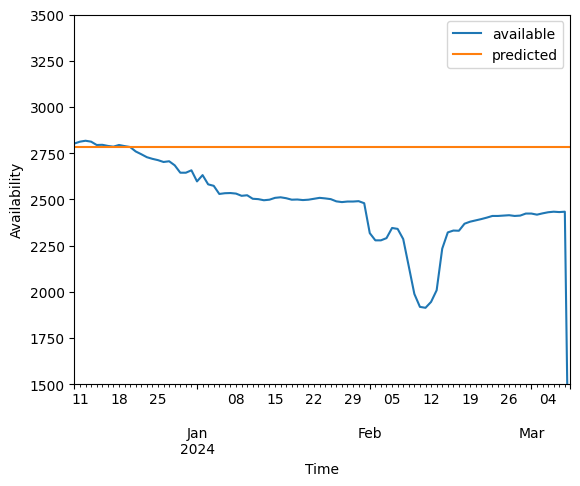

In [ ]:
%matplotlib inline

ax = mktsup_valid_ts.plot(label='available')
ax = predict_SES.plot(label='predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Availability')
ax.set_ylim(1500, 3500)
plt.legend()
plt.show()

In [ ]:
mktsup_valid_ts

date
2023-12-10    2802
2023-12-11    2812
2023-12-12    2817
2023-12-13    2812
2023-12-14    2794
              ... 
2024-03-04    2430
2024-03-05    2433
2024-03-06    2431
2024-03-07    2433
2024-03-08     272
Name: available, Length: 90, dtype: int64

In [ ]:
predict_SES

2023-12-10    2783.985302
2023-12-11    2783.985302
2023-12-12    2783.985302
2023-12-13    2783.985302
2023-12-14    2783.985302
                 ...     
2024-03-04    2783.985302
2024-03-05    2783.985302
2024-03-06    2783.985302
2024-03-07    2783.985302
2024-03-08    2783.985302
Freq: D, Length: 90, dtype: float64

# ARIMA models

In [ ]:
train_ts_log = mkt_sup_log[:nTrain]
valid_ts_log = mkt_sup_log[nTrain:]

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller test')
dftest = adfuller(mkt_sup_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p_value', '#lags used', 'Number of observations used'])

for key , value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dickey-Fuller test
Test Statistic                   0.383487
p_value                          0.980867
#lags used                       4.000000
Number of observations used    361.000000
Critical Value (1%)             -3.448595
Critical Value (5%)             -2.869580
Critical Value (10%)            -2.571053
dtype: float64


In [ ]:
import itertools

p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
display(pdq)
display(seasonal_pdq)

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
import sys

import warnings
warnings.filterwarnings('ignore')

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
          temp_model = sm.tsa.statespace.SARIMAX(train_ts_log,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
      
          results = temp_model.fit()

          if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
    
        except:
          continue

print('Best SARIMAX{}*{}12 model - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)*(1, 0, 1, 12)12 model - AIC:-1097.2467566203538


In [ ]:
best_model = sm.tsa.statespace.SARIMAX(train_ts_log,
                                       order=(1,1,1),
                                       seasonal_order=(1,0,1,12),
                                       enforce_stationarity=True,
                                       enforce_invertibility=True)

best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

#we ignore sigma

#we need to look at coefficient of ma, it is the coefficient for theta on slide 76


                                     SARIMAX Results                                      
Dep. Variable:                          available   No. Observations:                  276
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 553.623
Date:                            Sun, 07 May 2023   AIC                          -1097.247
Time:                                    20:47:39   BIC                          -1079.163
Sample:                                03-09-2023   HQIC                         -1089.989
                                     - 12-09-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1847      0.096      1.922      0.055      -0.004       0.373
ma.L1          0.3227      0.086   

In [ ]:
#predicted numbers here
pred = best_results.get_forecast(steps=90, alpha=0.05)

In [ ]:
!pip install dmba

from dmba import regressionSummary

regressionSummary(np.power(10, valid_ts_log),
                  np.power(10, pred.predicted_mean))

#we use the log transformed sales data to build the model so here,
# we need to convert our validation and predicted sales back to their original values from the log transformations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Regression statistics

                      Mean Error (ME) : -521.7854
       Root Mean Squared Error (RMSE) : 622.4344
            Mean Absolute Error (MAE) : 521.9178
          Mean Percentage Error (MPE) : -31.9458
Mean Absolute Percentage Error (MAPE) : 31.9505
